In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-sales-dataset/Test_u94Q5KV.csv
/kaggle/input/big-mart-sales-dataset/Train_UWu5bXk.csv


In [98]:
test=pd.read_csv("/kaggle/input/big-mart-sales-dataset/Test_u94Q5KV.csv")
train=pd.read_csv("/kaggle/input/big-mart-sales-dataset/Train_UWu5bXk.csv")

In [99]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [101]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [102]:
def idrop(a):
    a.drop("Item_Identifier",axis=1,inplace=True)
    a.drop("Outlet_Identifier",axis=1,inplace=True)

In [103]:
idrop(train)

In [104]:
def split(a):
    num=a.select_dtypes(include=[np.number]) 
    cat=a.select_dtypes(exclude=[np.number])
   
    return num,cat
    

In [105]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [106]:
import numpy as np
def missvalue(a):
    l=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
    for i in l:
        if a[i].dtypes!='O':
            med=a[i].median()
            a[i].fillna(med,inplace=True)
        else:
            m=a[i].value_counts().index[0]
            a[i].fillna(m,inplace=True)  

In [107]:
missvalue(train)

In [108]:
x,y=split(train)

In [109]:
y.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [110]:
for t in y.columns:
    print(t+":")
    print(y[t].value_counts())
    print("-"*80)

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------------------------------------
Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------------------------------------------------------------------------
Outlet_Size:
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
--------------------------------------------------------------------------------
Outlet_Loca

In [111]:
x.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Item_Weight:


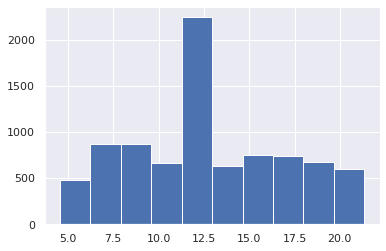

Item_Visibility:


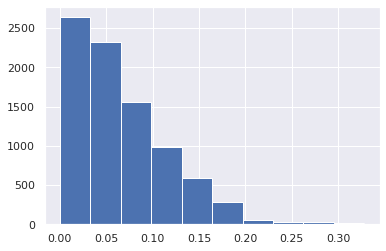

Item_MRP:


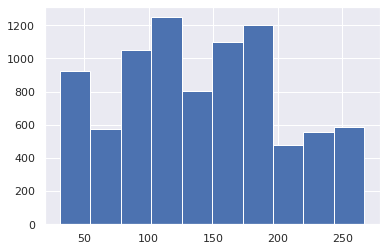

Outlet_Establishment_Year:


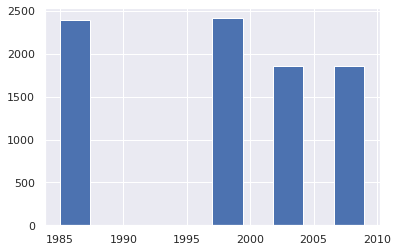

Item_Outlet_Sales:


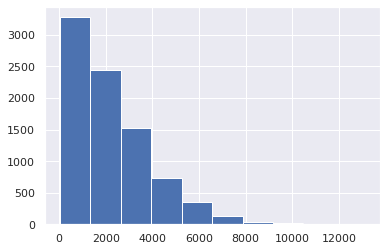

In [112]:
for t in x:
    
    print(t+":")
    sns.set(style="darkgrid")
    plt.figure()
    x[t].hist()
    plt.show()

In [113]:
x.columns


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [114]:
columns=x.columns

In [115]:
columns=['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']

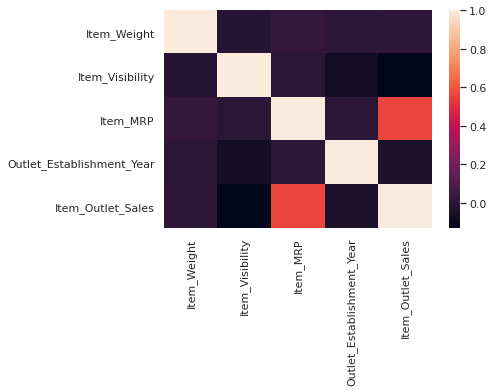

In [116]:
sns.heatmap(x.corr())

In [117]:
x.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


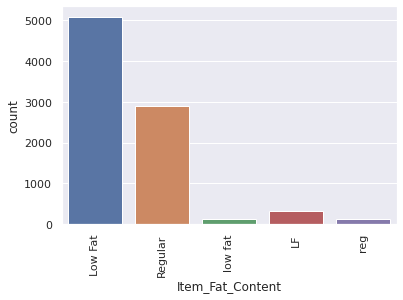

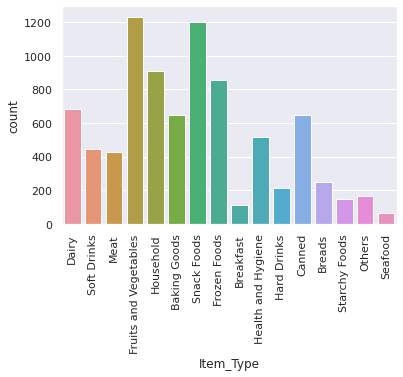

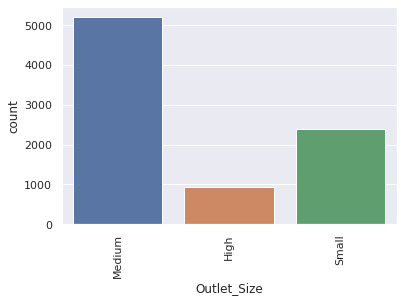

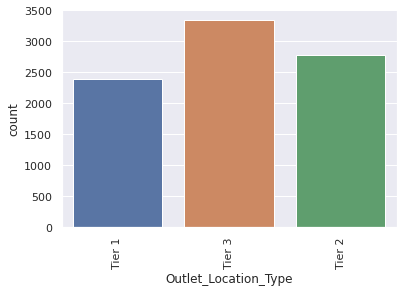

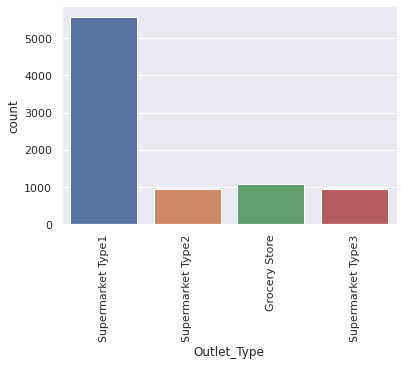

In [118]:
for i in y.columns:
      sns.set(style="darkgrid")
      plt.figure()
    
      chart=sns.countplot(i,data=y)
      chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [119]:
pd.pivot_table(train,index="Item_Fat_Content",values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Item_Fat_Content,
Regular,2235.186702
Low Fat,2164.477336
low fat,2087.740737
LF,2073.551928
reg,1962.192268


In [120]:
y.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [121]:
pd.pivot_table(train,index='Item_Type',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


In [122]:
pd.pivot_table(train,index='Outlet_Size',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2283.730470
Small,1912.149161


In [123]:
y.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [124]:
pd.pivot_table(train,index='Outlet_Location_Type',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2323.990559
Tier 3,2279.627651
Tier 1,1876.909159


In [125]:
pd.pivot_table(train,index='Outlet_Type',values="Item_Outlet_Sales").sort_values("Item_Outlet_Sales",ascending=False)

,Item_Outlet_Sales
Outlet_Type,
Supermarket Type3,3694.038558
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Grocery Store,339.828500


In [126]:
pd.pivot_table(train,index='Item_Type',values="Item_Weight").sort_values("Item_Weight",ascending=False)

,Item_Weight
Item_Type,
Others,13.615976
Starchy Foods,13.558074
Dairy,13.285565
Household,13.254522
Fruits and Vegetables,13.116753
Health and Hygiene,13.048452
Snack Foods,12.919354
Frozen Foods,12.824007
Meat,12.772341


In [127]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

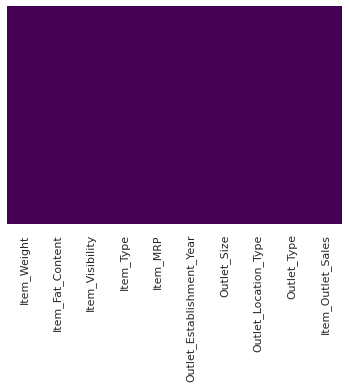

In [128]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [129]:
corr_matrix=train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.009693
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [130]:
def add(train):
    train["mrp per weight"]=train["Item_MRP"]/train["Item_Weight"]
    train["visibility per mrp"]=train["Item_Visibility"]/train["Item_MRP"]
    train["mrp per year"]=train["Item_MRP"]/train["Outlet_Establishment_Year"]

In [131]:
add(train)

In [132]:
corr_matrix=train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
mrp per year                 0.568108
Item_MRP                     0.567574
mrp per weight               0.392942
Item_Weight                  0.009693
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
visibility per mrp          -0.336575
Name: Item_Outlet_Sales, dtype: float64

In [133]:
def fdrop(a):
    a.drop("Item_Weight",axis=1,inplace=True)
    a.drop("Outlet_Establishment_Year",axis=1,inplace=True)
    a.drop("Item_Visibility",axis=1,inplace=True)

In [134]:
fdrop(train)

In [135]:
corr_matrix=train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales     1.000000
mrp per year          0.568108
Item_MRP              0.567574
mrp per weight        0.392942
visibility per mrp   -0.336575
Name: Item_Outlet_Sales, dtype: float64

In [136]:
def split(a):
    num=a.select_dtypes(include=[np.number]) 
    cat=a.select_dtypes(exclude=[np.number])
    cat=pd.get_dummies(cat)
    return num,cat
    

In [137]:
t,q=split(train)

In [138]:
y.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [139]:
q.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [140]:
from sklearn.preprocessing import StandardScaler
labels=t["Item_Outlet_Sales"].values
t.drop(["Item_Outlet_Sales"],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
t.head()

,Item_MRP,mrp per weight,visibility per mrp,mrp per year
0,249.8092,26.861204,0.000064,0.124967
1,48.2692,8.153581,0.000399,0.024026
2,141.6180,8.092457,0.000118,0.070844
3,182.0950,9.484115,0.000000,0.091139
4,53.8614,6.031512,0.000000,0.027107


In [142]:
scaler=StandardScaler()
def scaling(x,y):
     f_s=scaler.fit_transform(x.values)
     q_s=y.values
     vk=np.concatenate((f_s,q_s),axis=1)
     return vk

In [143]:
features=scaling(t,q)

In [144]:
from sklearn.model_selection import train_test_split
import numpy
numpy.random.seed(1234)
(x_train,x_test,y_train,y_test) = train_test_split(features,labels, train_size=0.75, random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [146]:
pred=lin_reg.predict(x_test)

In [147]:
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)

In [148]:
lin_rmse

1094.5367267027143

In [149]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [150]:
pred=tree_reg.predict(x_test)

In [151]:
lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)

In [152]:
lin_rmse

1486.4805496066817

In [153]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,features,labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)


In [154]:
rmse_scores

array([1522.97012535, 1534.11391503, 1544.1399171 , 1532.74693629,
       1479.96330596, 1525.01102837, 1512.14852088, 1585.83644901,
       1425.0708544 , 1537.94988155])

In [155]:
rmse_scores.mean()

1519.9950933939824

In [156]:
scores=cross_val_score(tree_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [157]:
rmse_scores

array([1437.21887012, 1543.31158678, 1483.58635563, 1585.75853765,
       1441.11514474, 1543.39749683, 1413.76002795, 1545.33484553,
       1560.63540648, 1608.00901374])

In [158]:
scores=cross_val_score(lin_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [159]:
rmse_scores

array([1139.12186957, 1083.68688616, 1121.25608569, 1169.90331609,
       1114.61555383, 1218.44975057, 1073.12381485, 1175.28400637,
       1142.19250017, 1210.70516583])

In [160]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
forest_reg.fit(x_train,y_train)
pred=forest_reg.predict(x_test)
lin_mse=mean_squared_error(y_test,pred)
lin_rmse=np.sqrt(lin_mse)

In [161]:
lin_rmse

1045.169752420001

In [162]:
scores=cross_val_score(forest_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [163]:
rmse_scores.mean ()

1101.0679760964263

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg=RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [165]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [166]:
final_model = grid_search.best_estimator_

In [167]:
final_prediction=final_model.predict(x_test)

In [168]:
final_mse = mean_squared_error(y_test, final_prediction)

In [169]:
final_rmse = np.sqrt(final_mse) 

In [170]:
final_rmse

1109.852616580036

In [171]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [172]:
p=test["Item_Identifier"]
w=test['Outlet_Identifier']
result = pd.concat([p, w], axis=1, join='inner')


In [173]:
idrop(test)

In [174]:
import numpy as np
def miss(a):
    l=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type']
    for i in l:
        if a[i].dtypes!='O':
            med=a[i].median()
            a[i].fillna(med,inplace=True)
        else:
            m=a[i].value_counts().index[0]
            a[i].fillna(m,inplace=True)   

In [175]:
miss(test)

In [176]:
add(test)

In [177]:
fdrop(test)

In [178]:
t,q=split(test)

In [179]:
feat=scaling(t,q)

In [181]:
ped=grid_search.best_estimator_.predict(feat)

In [182]:
ped

array([1737.69361333, 1419.30805333,  729.89434667, ..., 2033.57513333,
       4656.58300667, 1515.31641333])